In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6719feb8e1c791095c1330ce7ddcadb7


In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | changji
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | dubai
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | svetlogorsk
Processing Record 10 of Set 1 | sergeyevka
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kropotkin
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | strezhevoy
Processing Record 16 of Set 1 | santa cruz
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | chlorakas
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | karimpur
Processing Record 23 of Set 1 | tasiilaq
Processing Record 24 of Set 1 | mnogovershinnyy
Proce

Processing Record 42 of Set 4 | pskov
Processing Record 43 of Set 4 | kostino
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | vanavara
Processing Record 46 of Set 4 | benguela
Processing Record 47 of Set 4 | bonfim
Processing Record 48 of Set 4 | nishihara
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | srednekolymsk
Processing Record 2 of Set 5 | mayo
Processing Record 3 of Set 5 | yarada
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | temaraia
City not found. Skipping...
Processing Record 6 of Set 5 | osvaldo cruz
Processing Record 7 of Set 5 | papar
Processing Record 8 of Set 5 | rocky mountain house
Processing Record 9 of Set 5 | fortuna
Processing Record 10 of Set 5 | alta floresta
Processing Record 11 of Set 5 | goure
Processing Record 12 of Set 5 | krasnoselkup
Processing Record 13 of Set 5 | takoradi
Processing Record 14 of Set 5 | saint-pierre
Processing Record

Processing Record 31 of Set 8 | togitsu
Processing Record 32 of Set 8 | kirakira
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | paita
Processing Record 38 of Set 8 | phan rang
City not found. Skipping...
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | atlantic city
Processing Record 41 of Set 8 | impfondo
Processing Record 42 of Set 8 | oyem
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | luwuk
Processing Record 46 of Set 8 | tilichiki
Processing Record 47 of Set 8 | mantua
Processing Record 48 of Set 8 | najran
Processing Record 49 of Set 8 | bodden town
Processing Record 50 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 9 | deputatskiy
Processing Record 2 of Set 9 | muros
Processing Record 3 of Set 9 | tarudant
Ci

Processing Record 16 of Set 12 | san vito
Processing Record 17 of Set 12 | qafsah
City not found. Skipping...
Processing Record 18 of Set 12 | sangin
Processing Record 19 of Set 12 | shatrovo
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | gangotri
City not found. Skipping...
Processing Record 22 of Set 12 | maldonado
Processing Record 23 of Set 12 | megion
Processing Record 24 of Set 12 | prince george
Processing Record 25 of Set 12 | garoua
Processing Record 26 of Set 12 | quchan
Processing Record 27 of Set 12 | ribnitz-damgarten
Processing Record 28 of Set 12 | belaya gora
Processing Record 29 of Set 12 | lolua
City not found. Skipping...
Processing Record 30 of Set 12 | termoli
Processing Record 31 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 32 of Set 12 | luorong
Processing Record 33 of Set 12 | talara
Processing Record 34 of Set 12 | tatarsk
Processing Record 35 of Set 12 | karagay
Processing Record 36 of Set 12 | anadyr
Processi

In [12]:
#Check number of cities in city_data
len(city_data)

548

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,51.80,82,38,3.44,US,2021-04-03 16:45:21
1,Changji,44.0167,87.3167,46.40,53,0,2.24,CN,2021-04-03 16:45:21
2,Torbay,47.6666,-52.7314,45.00,93,75,16.11,CA,2021-04-03 16:44:50
3,Dubai,25.2582,55.3047,87.80,27,0,2.30,AE,2021-04-03 16:45:22
4,Albany,42.6001,-73.9662,46.00,17,1,1.01,US,2021-04-03 16:45:22
5,Provideniya,64.3833,-173.3000,4.51,92,99,10.85,RU,2021-04-03 16:45:00
6,Rikitea,-23.1203,-134.9692,77.18,68,55,15.66,PF,2021-04-03 16:45:22
7,Mar Del Plata,-38.0023,-57.5575,75.20,60,40,9.22,AR,2021-04-03 16:43:26
8,Svetlogorsk,52.6333,29.7333,39.72,75,100,4.72,BY,2021-04-03 16:45:23
9,Sergeyevka,53.8800,67.4158,31.44,82,100,11.27,KZ,2021-04-03 16:45:23


In [21]:
#Reorder columns in city_data DataFrame
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2021-04-03 16:45:21,34.6391,-120.4579,51.80,82,38,3.44
1,Changji,CN,2021-04-03 16:45:21,44.0167,87.3167,46.40,53,0,2.24
2,Torbay,CA,2021-04-03 16:44:50,47.6666,-52.7314,45.00,93,75,16.11
3,Dubai,AE,2021-04-03 16:45:22,25.2582,55.3047,87.80,27,0,2.30
4,Albany,US,2021-04-03 16:45:22,42.6001,-73.9662,46.00,17,1,1.01
5,Provideniya,RU,2021-04-03 16:45:00,64.3833,-173.3000,4.51,92,99,10.85
6,Rikitea,PF,2021-04-03 16:45:22,-23.1203,-134.9692,77.18,68,55,15.66
7,Mar Del Plata,AR,2021-04-03 16:43:26,-38.0023,-57.5575,75.20,60,40,9.22
8,Svetlogorsk,BY,2021-04-03 16:45:23,52.6333,29.7333,39.72,75,100,4.72
9,Sergeyevka,KZ,2021-04-03 16:45:23,53.8800,67.4158,31.44,82,100,11.27


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

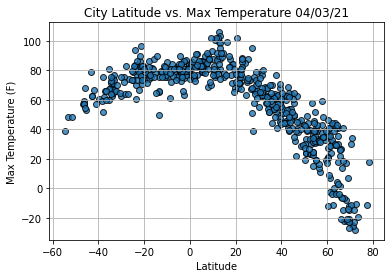

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

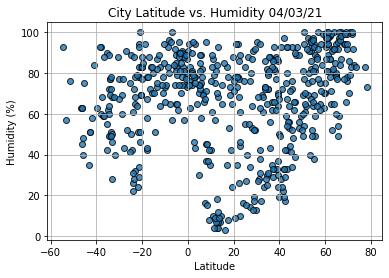

In [27]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

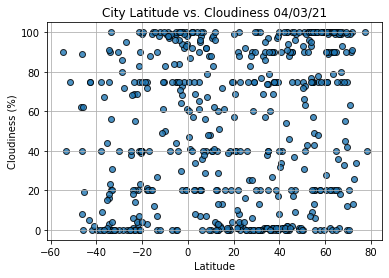

In [28]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

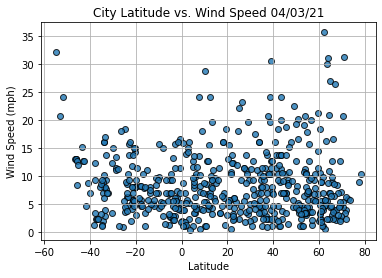

In [29]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Rikitea,PF,2021-04-03 16:45:22,-23.1203,-134.9692,77.18,68,55,15.66
7,Mar Del Plata,AR,2021-04-03 16:43:26,-38.0023,-57.5575,75.20,60,40,9.22
10,Hermanus,ZA,2021-04-03 16:42:54,-34.4187,19.2345,68.00,72,3,1.99
15,Santa Cruz,BO,2021-04-03 16:45:24,-17.8000,-63.1667,86.00,58,75,5.75
17,East London,ZA,2021-04-03 16:44:33,-33.0153,27.9116,66.20,68,0,9.22
...,...,...,...,...,...,...,...,...,...
532,Arenapolis,BR,2021-04-03 16:47:47,-14.4503,-56.8461,89.76,51,100,4.03
536,Talcahuano,CL,2021-04-03 16:47:48,-36.7167,-73.1167,66.20,59,0,2.30
540,Burnie,AU,2021-04-03 16:47:49,-41.0667,145.9167,56.95,84,2,8.66
541,Nueva Germania,PY,2021-04-03 16:47:49,-23.9000,-56.5667,93.78,31,18,3.69


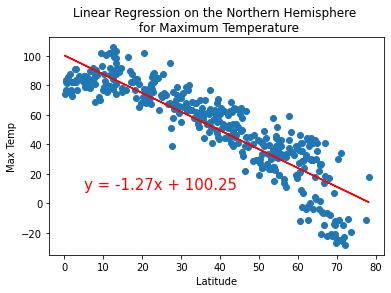

LinregressResult(slope=-1.270953737402391, intercept=100.25246428049685, rvalue=-0.8866951894904135, pvalue=2.296086122669688e-128, stderr=0.03413184467465053)

In [78]:
#Max Temp 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,10))

linregress(x_values,y_values)

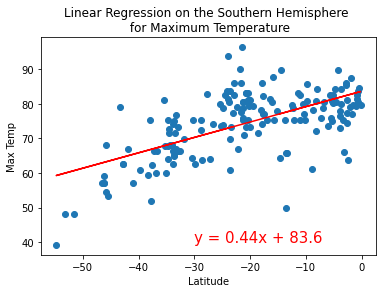

LinregressResult(slope=0.44445949677164254, intercept=83.5962753984985, rvalue=0.6310023915752779, pvalue=3.73700774875308e-20, stderr=0.04228458026771994)

In [70]:
#Max Temp
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,40))
#Check the r-values
linregress(x_values,y_values)

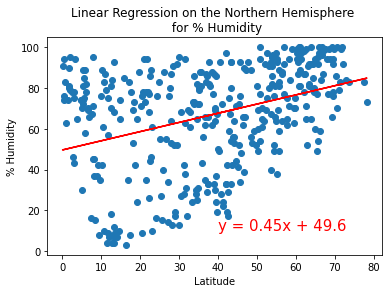

LinregressResult(slope=0.45062522973054653, intercept=49.59764857275087, rvalue=0.3657015459624247, pvalue=1.9504999108101078e-13, stderr=0.05906670695510656)

In [91]:
# Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

#Check the r-values
linregress(x_values,y_values)

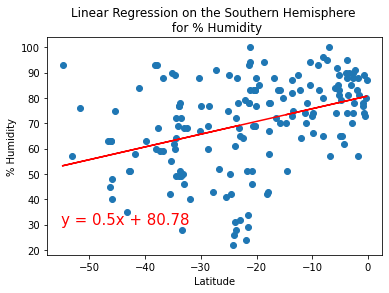

LinregressResult(slope=0.5027678162985444, intercept=80.77645590686804, rvalue=0.38023408141005594, pvalue=3.4109471256299256e-07, stderr=0.09463426452508675)

In [92]:
# Humidity
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,30))

#Check the r-values
linregress(x_values,y_values)

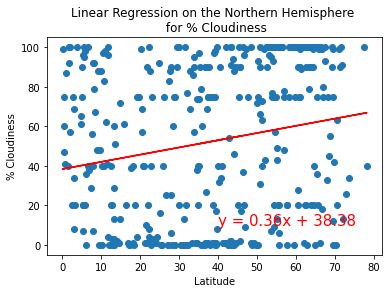

LinregressResult(slope=0.36450107713996394, intercept=38.379112861661994, rvalue=0.19487541336362854, pvalue=0.00013456310591313566, stderr=0.09448523521476555)

In [93]:
# Cloudiness 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

#Check the r-values
linregress(x_values,y_values)

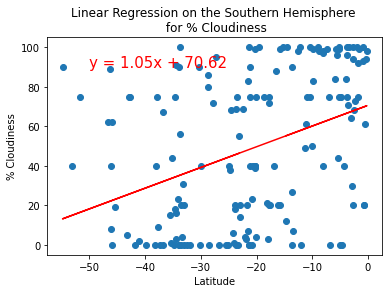

LinregressResult(slope=1.0480956299941517, intercept=70.61621475167344, rvalue=0.37887771159838424, pvalue=3.7839033655230724e-07, stderr=0.19810482340275143)

In [97]:
# Cloudiness 
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,90))

#Check the r-values
linregress(x_values,y_values)

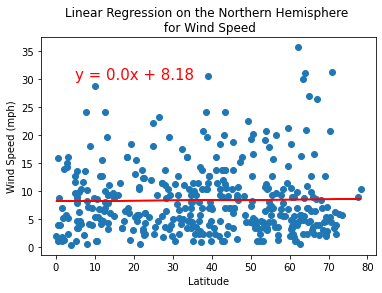

LinregressResult(slope=0.004731677354650355, intercept=8.176385775669825, rvalue=0.016054228091049106, pvalue=0.7553976155276227, stderr=0.015177458174392255)

In [100]:
# Wind Speed 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(5,30))

#Check the r-values
linregress(x_values,y_values)

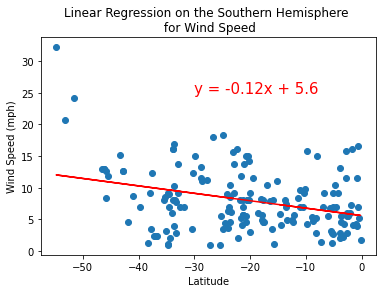

LinregressResult(slope=-0.11729249070150273, intercept=5.599443223338776, rvalue=-0.32647679397140417, pvalue=1.4776016691898073e-05, stderr=0.02627760416206529)

In [103]:
# Wind Speed 
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-30,25))

#Check the r-values
linregress(x_values,y_values)